In [1]:
import numpy as np #Linear algebra and mathematical operations
import pandas as pd #importing and loading data
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import time

In [2]:
iris_df = pd.read_csv("/content/drive/MyDrive/Data Science /Iris.csv")
iris_df = iris_df.sample(frac=1).reset_index(drop=True) # Shuffle

In [3]:
iris_df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,86,6.0,3.4,4.5,1.6,Iris-versicolor
1,30,4.7,3.2,1.6,0.2,Iris-setosa
2,65,5.6,2.9,3.6,1.3,Iris-versicolor
3,34,5.5,4.2,1.4,0.2,Iris-setosa
4,133,6.4,2.8,5.6,2.2,Iris-virginica


In [4]:

X = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = np.array(X)
X[:5]


array([[6. , 3.4, 4.5, 1.6],
       [4.7, 3.2, 1.6, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 4.2, 1.4, 0.2],
       [6.4, 2.8, 5.6, 2.2]])

In [5]:
one_hot_encoder = OneHotEncoder(sparse=False)
Y = iris_df.Species
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))
Y[:5]

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [7]:
class ANN_Classification():

  
    def __init__ (self, hidden_Layer_Size = [100,], learning_Rate = 0.001, epochs = 10,  hyperparameter = False):
        self.hidden_Layer_Size = hidden_Layer_Size
        self.learning_Rate = learning_Rate
        self.epochs = epochs
       # self.activation_function = activation_function
        self.weights = None
        self.hyperparameter = hyperparameter

    
    def sigmoid(self, x, derivative=False):
        if derivative:
            return np.multiply(x, 1-x)
        return 1/(1 + np.exp(-x))
        

    def softmax(self, x):
        # Numerically stable with large exponentials
        exps = np.exp(x - x.max())
        return exps / np.sum(exps, axis=0)
            

    #function for forward propogation
    def forward_Prop(self, x, layers):
        activations, layer_input = [x], x
        for j in range(layers):
         # i = 
          #print("i = "+str(i))
          if j <= (layers-1):

            activation = self.sigmoid(np.dot(layer_input, self.weights[j].T))
            activations.append(activation)
            layer_input = np.append(1, activation)

          else :
            activation = self.softmax(np.dot(layer_input, self.weights[j].T))
            activations.append(activation)
            layer_input = np.append(1, activation)

        return activations


    def back_prop(self, y, activations, layers):
      outputFinal = activations[-1]
      error = np.matrix(y - outputFinal) 
      
      # Error after 1 cycle
      for j in range(layers, 0, -1):
        currActivation = activations[j]
       
        if(j > 1):
          # Append previous
          prevActivation = np.append(1, activations[j-1])
        else:
          # First hidden layer
          prevActivation = activations[0]
       
        delta = np.multiply(error, self.sigmoid(currActivation, derivative = True))
        self.weights[j-1] += self.learning_Rate * np.multiply(delta.T, prevActivation)
         
        wc = np.delete(self.weights[j-1], [0], axis=1)
        error = np.dot(delta, wc) #current layer error
       
      return self.weights

    
    def initialize_Weight(self, layers):
      layer, self.weights = len(layers), []
      #for loop to intialize the weight randomly
      for i in range(1, layer):
        #assigning random weights
        w = [[np.random.uniform(-1, 1) for j in range(layers[i-1] + 1)]for k in range(layers[i])]
        self.weights.append(np.matrix(w))
    
      return self.weights
    

    #train function
    def train(self, X, y):
        layers_weights = len(self.weights)
        
        for i in range(len(self.X)):
          x, y = self.X[i], self.y[i]
          x = np.matrix(np.append(1, x))
          
          activations = self.forward_Prop(x, layers_weights)
          self.weights = self.back_prop(y, activations, layers_weights)
          
        return self.weights


    def fit(self, X, y):
        intiate_time = time.perf_counter()
        self.X = X
        self.y = y
        hidden_Layers = len(self.hidden_Layer_Size) - 1
        self.weights = self.initialize_Weight(self.hidden_Layer_Size)

        for epoch in range(1, self.epochs+1):
          epoch_intiate_time = time.perf_counter()
          weights = self.train(self.X, self.y)

          epoch_closing_time = time.perf_counter()
          closing_time = time.perf_counter()
          
          epoch_total_time = epoch_closing_time - epoch_intiate_time
          total_time = closing_time - intiate_time
          
          if self.hyperparameter == False:
            print ("Epoch : {}".format(epoch))
            print ("Elapsed Time : {}".format(total_time))
            print ("Step Time : {}\n\n".format(epoch_total_time))
            
        return self.weights

        
    def Predict(self, X):
        result = []
        for i in range(len(X)):
          x = X[i]
          #print(str(i) + " " + str(len(X)))
          layers = len(self.weights)
          item = np.append(1, x)

          # Forward prop.
          activations = self.forward_Prop(item, layers)
          
          Final_output = activations[-1].A1
          index = self.FindMaxActivation(Final_output)
          
          predicted = [0 for j in range(len(Final_output))]
          predicted[index] = 1 
      
          
          result.append(predicted)
        
        return result
      
    def FindMaxActivation(self, output):
        m, index = output[0], 0
        for i in range(1, len(output)):
          if(output[i] > m):
            m, index = output[i], i
        
        return index

In [8]:
first = len(X[0]) # no. of features
output = len(Y[0]) # no. of classes

# Define hyperparameters to search over
hidden_layer_sizes = [[first, 50, output], [first, 100, output], [first, 50, 50, output], [first, 100, 100, output]]
learning_rates = [0.001, 0.01, 0.1, 0.15, 0.05]
epochs = [10, 20, 30, 100, 200]

best_score = 0
best_params = {}

# Loop over all possible hyperparameter combinations
for hidden_size in hidden_layer_sizes:
    for lr in learning_rates:
        for epoch in epochs:
            
            model = ANN_Classification(hidden_Layer_Size=hidden_size, learning_Rate=lr, epochs=epoch, hyperparameter = True)
            model.fit(X_train, Y_train)
            
            y_pred = model.Predict(X_test)
            score = accuracy_score(Y_test, y_pred)
            
            if score > best_score:
                best_score = score
                best_params = {'hidden_Layer_Size': hidden_size, 'learning_Rate': lr, 'epochs': epoch}

final_model = ANN_Classification(**best_params)

hyper_start_time = time.time()
final_model.fit(np.concatenate([X_train, X_test]), np.concatenate([Y_train, Y_test]))
hyper_end_time = time.time()
model_time = hyper_end_time - hyper_start_time

y_pred_aht = final_model.Predict(X_test)
final_score = accuracy_score(Y_test, y_pred_aht)
print("Best Parameters : {}".format(best_params))
print("Final Score = {}".format(final_score))

Epoch : 1
Elapsed Time : 0.07015174299999671
Step Time : 0.06862521300001845


Epoch : 2
Elapsed Time : 0.12986175499997898
Step Time : 0.055295890999957464


Epoch : 3
Elapsed Time : 0.1661682219999534
Step Time : 0.03507334699997955


Epoch : 4
Elapsed Time : 0.20158287900000005
Step Time : 0.03425985699999501


Epoch : 5
Elapsed Time : 0.23681491599995752
Step Time : 0.0340934070000003


Epoch : 6
Elapsed Time : 0.27249205299995083
Step Time : 0.03451783700000988


Epoch : 7
Elapsed Time : 0.31113570999997364
Step Time : 0.03649386699999013


Epoch : 8
Elapsed Time : 0.3462838269999793
Step Time : 0.03400210600000264


Epoch : 9
Elapsed Time : 0.38355426399999715
Step Time : 0.03614243700002362


Epoch : 10
Elapsed Time : 0.4234962819999737
Step Time : 0.03878645800000413


Epoch : 11
Elapsed Time : 0.4698586309999655
Step Time : 0.04521619899998086


Epoch : 12
Elapsed Time : 0.5115823389999719
Step Time : 0.040230277000034675


Epoch : 13
Elapsed Time : 0.5582845079999856
Step Tim

In [9]:
first = len(X[0]) # no. of features
output = len(Y[0]) # no. of classes

layers = [first, 5, 10, output] # no. of nodes 
L, E = 0.15, 200
#calling neural network function
weights = ANN_Classification(hidden_Layer_Size = layers, epochs=E, learning_Rate = L)

In [10]:
manual_start_time = time.time()
ans = weights.fit(X_train, Y_train)
manual_end_time = time.time()
manual_model_time = manual_end_time - manual_start_time

Epoch : 1
Elapsed Time : 0.032236065999995844
Step Time : 0.03161719600001334


Epoch : 2
Elapsed Time : 0.0636285520000115
Step Time : 0.030241375999992215


Epoch : 3
Elapsed Time : 0.09462160800001129
Step Time : 0.030275446000018746


Epoch : 4
Elapsed Time : 0.13098825499997702
Step Time : 0.036228536999999505


Epoch : 5
Elapsed Time : 0.17574171399996885
Step Time : 0.04389886900003148


Epoch : 6
Elapsed Time : 0.2127471609999816
Step Time : 0.03686666700002661


Epoch : 7
Elapsed Time : 0.2530786990000138
Step Time : 0.04019346799998402


Epoch : 8
Elapsed Time : 0.28863256599998977
Step Time : 0.03541804700000739


Epoch : 9
Elapsed Time : 0.32073679199999106
Step Time : 0.031971266000027754


Epoch : 10
Elapsed Time : 0.3534705380000105
Step Time : 0.03259977600004049


Epoch : 11
Elapsed Time : 0.39781932699997924
Step Time : 0.044223529000021244


Epoch : 12
Elapsed Time : 0.43209580399997094
Step Time : 0.03411439699999619


Epoch : 13
Elapsed Time : 0.4682521010000187
St

In [11]:
y_pred_manual = weights.Predict(X_test)
score_manual = accuracy_score(Y_test, y_pred_manual)

# **Using Keras**

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [13]:
# Build the model

model = Sequential()

model.add(Dense(5, input_shape=(4,), activation='sigmoid', name='h1'))
model.add(Dense(10, activation='sigmoid', name='h2'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.15)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
keras_start_time = time.time()
model.fit(X_train, Y_train, epochs=200)
keras_end_time = time.time()
keras_model_time = keras_end_time - keras_start_time

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 1.2787 - accuracy: 0.2441
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1.1296 - accuracy: 0.3307
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 1.0783 - accuracy: 0.3307
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 1.0342 - accuracy: 0.3937
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.8809 - accuracy: 0.6850
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.7480
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.6457
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.6850
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.6850
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.9449
Epoch 11/200
4/4 [===========

In [15]:
loss, score_keras = model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 150ms/step - loss: 0.0505 - accuracy: 0.9565


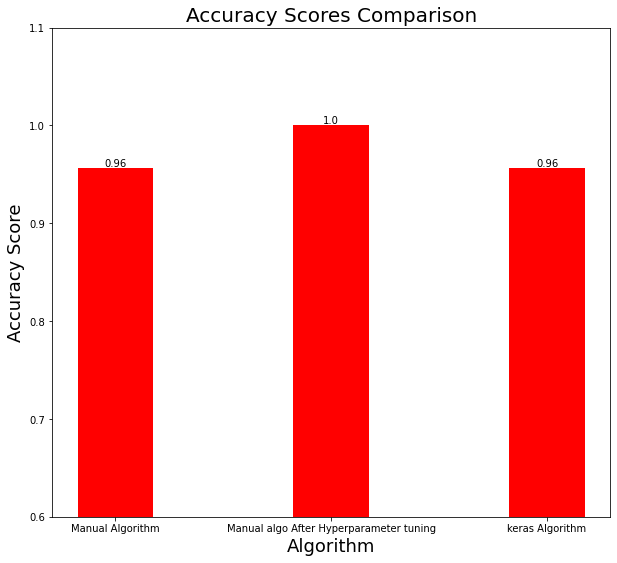

In [16]:
import matplotlib.pyplot as plt
# Plot the comparison graph for manual accuracy score and keras accuracy score.
labels = ['Manual Algorithm','Manual algo After Hyperparameter tuning', 'keras Algorithm']
x_pos = [i for i, _ in enumerate(labels)]

plt.subplots(figsize=(10, 9))

scores = [score_manual, final_score, score_keras]

plt.bar(x_pos, scores, color='red', width = 0.35 )

plt.ylim([0.6, max(scores) + 0.1])

plt.title('Accuracy Scores Comparison', fontsize = 20)
plt.xlabel('Algorithm', fontsize = 18)
plt.ylabel('Accuracy Score', fontsize = 18)

plt.xticks(x_pos, labels)

# Add annotations for each bar
for i, v in enumerate(scores):
    plt.annotate(str(round(v, 2)), xy=(i, v), ha='center', va='bottom')

# Display the graph
plt.show()

Text(0, 0.5, 'Accuracy Score')

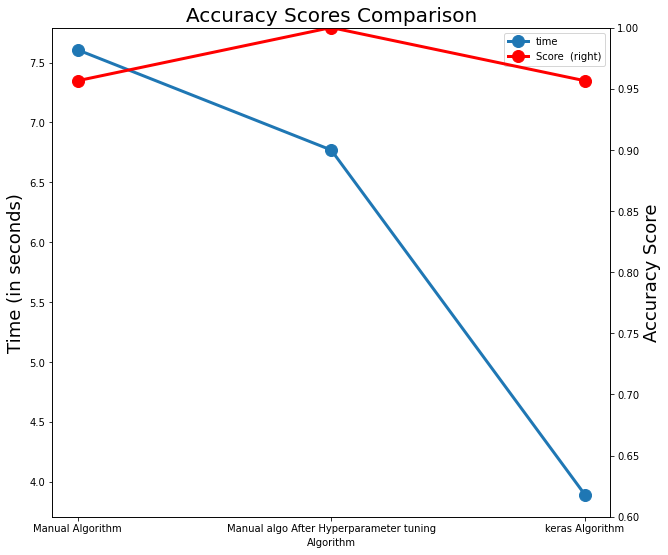

In [18]:
df= pd.DataFrame({'Algorithm': ['Manual Algorithm', 'Manual algo After Hyperparameter tuning', 'keras Algorithm'],
              'Time Taken' : [manual_model_time, model_time, keras_model_time] , 'Accuracy': [score_manual, final_score, score_keras],
              })


fig, ax = plt.subplots(figsize=(10, 9))
df.plot('Algorithm','Time Taken', marker = 'o', label='time', ax=ax, linewidth = 3, markersize = 12 )
df.plot('Algorithm','Accuracy', marker = 'o', label= 'Score ', secondary_y=True,  ax=ax, color = 'r', linewidth = 3, markersize = 12 )

plt.xticks(x_pos, labels, fontsize = 18)
ax.right_ax.set_ylim(0.60, 1.0)

plt.title('Accuracy Scores Comparison', fontsize = 20)
ax.set_ylabel('Time (in seconds)', fontsize = 18)
ax.right_ax.set_ylabel('Accuracy Score', fontsize = 18)